## Prediction of loan 
Problem Statement
Problem Statement A bank had collected data about historical loan default along with respective information for each member. We need to build a model that will help this bank by predicting the probability that a member will default.

In [3]:
##for data manipulation and ml algorithm

import pandas as pd 
import numpy as np
import sklearn 


In [22]:
# For Visaulisation purpose 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
conda install -c conda-forge imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https//conda.anaconda.org/conda-forge/win-64'




In [4]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline
seed=66

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
conda install -c conda-forge imbalanced-learn

In [ ]:
$ pytest imblearn -v

##Data Understanding and Exploration
Let's first have a look at the dataset and understand the size, attribute names etc.

In [ ]:
## for visulisation purpose
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [10]:
##import a data set
train2= pd.read_csv("train_data_2.csv")
Default = train2.copy()

C:\Users\win 10\AppData\Local\Temp\ipykernel_9604\386529951.py:2: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  train2= pd.read_csv("train_data_2.csv")


In [11]:
Default.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,6068856,10000,10000,10000.0,36 months,BAT2428731,13.11,B,B4,Desert Christian School,...,0.0,44.0,INDIVIDUAL,NaN,139th week,0.0,0.0,10581.0,22600.0,0
1,47022153,23400,23400,23400.0,60 months,BAT4136152,22.99,F,F1,Senior Desktop Support Specialist,...,0.0,NaN,INDIVIDUAL,NaN,39th week,0.0,0.0,48710.0,48000.0,0
2,58669830,10000,10000,10000.0,36 months,BAT3873588,9.99,B,B3,Distribution Tech,...,0.0,NaN,INDIVIDUAL,NaN,26th week,0.0,0.0,25770.0,14800.0,0
3,63475668,6500,6500,6425.0,36 months,BAT4271519,15.61,D,D1,Sales Representative,...,0.0,NaN,INDIVIDUAL,NaN,4th week,0.0,0.0,44810.0,8100.0,1
4,49574009,11000,11000,11000.0,36 months,BAT1104812,12.69,C,C2,Account supervisor,...,0.0,NaN,INDIVIDUAL,NaN,39th week,0.0,394.0,11853.0,10000.0,0


In [12]:
Default.sample(2)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
208735,2738348,14000,14000,14000.0,36 months,BAT5811547,14.09,B,B5,Henry Ford Health System,...,0.0,NaN,INDIVIDUAL,NaN,13th week,0.0,0.0,138257.0,35900.0,1
60392,64727672,20000,20000,20000.0,36 months,NaN,11.53,B,B5,Senior Technician,...,0.0,36.0,INDIVIDUAL,NaN,17th week,0.0,0.0,84980.0,22900.0,0


In [13]:
Default.shape

(262428, 45)

In [14]:
# Transpose to check first 5 values for all the columns. 
Default.head(5).transpose()

,0,1,2,3,4
member_id,6068856,47022153,58669830,63475668,49574009
loan_amnt,10000,23400,10000,6500,11000
funded_amnt,10000,23400,10000,6500,11000
funded_amnt_inv,10000.0,23400.0,10000.0,6425.0,11000.0
term,36 months,60 months,36 months,36 months,36 months
batch_enrolled,BAT2428731,BAT4136152,BAT3873588,BAT4271519,BAT1104812
int_rate,13.11,22.99,9.99,15.61,12.69
grade,B,F,B,D,C
sub_grade,B4,F1,B3,D1,C2
emp_title,Desert Christian School,Senior Desktop Support Specialist,Distribution Tech,Sales Representative,Account supervisor


In [15]:
print("shape of {} is {}".format("Default",Default.shape))

shape of Default is (262428, 45)


In [16]:
Default.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,6068856,10000,10000,10000.0,36 months,BAT2428731,13.11,B,B4,Desert Christian School,...,0.0,44.0,INDIVIDUAL,NaN,139th week,0.0,0.0,10581.0,22600.0,0
1,47022153,23400,23400,23400.0,60 months,BAT4136152,22.99,F,F1,Senior Desktop Support Specialist,...,0.0,NaN,INDIVIDUAL,NaN,39th week,0.0,0.0,48710.0,48000.0,0
2,58669830,10000,10000,10000.0,36 months,BAT3873588,9.99,B,B3,Distribution Tech,...,0.0,NaN,INDIVIDUAL,NaN,26th week,0.0,0.0,25770.0,14800.0,0
3,63475668,6500,6500,6425.0,36 months,BAT4271519,15.61,D,D1,Sales Representative,...,0.0,NaN,INDIVIDUAL,NaN,4th week,0.0,0.0,44810.0,8100.0,1
4,49574009,11000,11000,11000.0,36 months,BAT1104812,12.69,C,C2,Account supervisor,...,0.0,NaN,INDIVIDUAL,NaN,39th week,0.0,394.0,11853.0,10000.0,0


In [17]:
Default.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [18]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262428 entries, 0 to 262427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    262428 non-null  int64  
 1   loan_amnt                    262428 non-null  int64  
 2   funded_amnt                  262428 non-null  int64  
 3   funded_amnt_inv              262428 non-null  float64
 4   term                         262428 non-null  object 
 5   batch_enrolled               168075 non-null  object 
 6   int_rate                     262428 non-null  float64
 7   grade                        262428 non-null  object 
 8   sub_grade                    262428 non-null  object 
 9   emp_title                    247220 non-null  object 
 10  emp_length                   249167 non-null  object 
 11  home_ownership               262428 non-null  object 
 12  annual_inc                   262427 non-null  float64
 13 

In [19]:
Default.home_ownership.unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

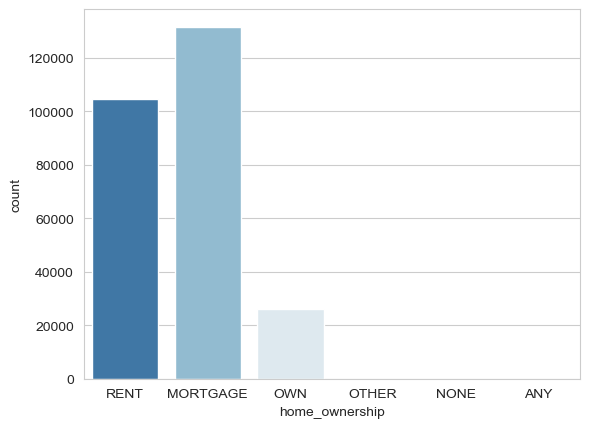

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='home_ownership',data=Default,palette='RdBu_r')

In [24]:
Default.home_ownership.value_counts()

MORTGAGE    131593
RENT        104709
OWN          26048
OTHER           62
NONE            15
ANY              1
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

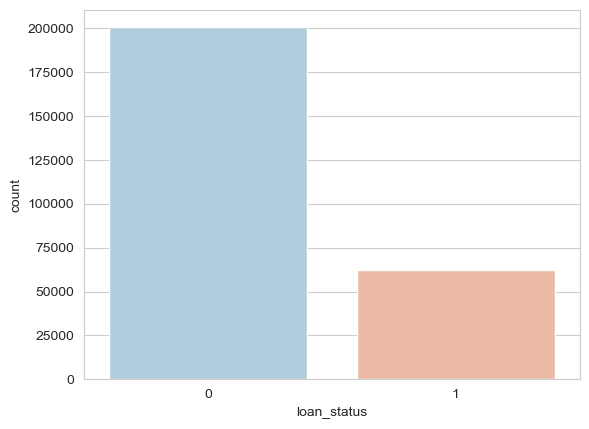

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='loan_status',data=Default,palette='RdBu_r')

In [26]:
Default.loan_status.value_counts()

0    200423
1     62005
Name: loan_status, dtype: int64

### This is formatted as code
So it is a problem of class imbalance

In [27]:
 #X_Default.select_dtypes(include=['object']).nunique()

In [28]:
Default.grade.unique()

array(['B', 'F', 'D', 'C', 'A', 'E', 'G'], dtype=object)

In [29]:
# check datatype of columns and filter object type columns to understand the further steps  
# Leave int and float as it is for now
Default.dtypes

member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
batch_enrolled                  object
int_rate                       float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                 

In [30]:
missing_cat=[var for var in Default.columns if Default[var].isnull().sum()>0 and Default[var].dtypes=='O']
missing_cat

['batch_enrolled',
 'emp_title',
 'emp_length',
 'desc',
 'title',
 'verification_status_joint']

In [31]:
Default[missing_cat]

,batch_enrolled,emp_title,emp_length,desc,title,verification_status_joint
0,BAT2428731,Desert Christian School,6 years,> I have excellent credit and have not missed ...,Debt consolidation,NaN
1,BAT4136152,Senior Desktop Support Specialist,10+ years,NaN,Debt consolidation,NaN
2,BAT3873588,Distribution Tech,9 years,NaN,Home improvement,NaN
3,BAT4271519,Sales Representative,10+ years,NaN,Debt consolidation,NaN
4,BAT1104812,Account supervisor,10+ years,NaN,Debt consolidation,NaN
...,...,...,...,...,...,...
262423,NaN,Registered Nurse,10+ years,NaN,Debt consolidation,NaN
262424,BAT2003848,Account Mgr,10+ years,NaN,Debt consolidation,NaN
262425,NaN,Comcast cable,8 years,NaN,Debt consolidation,NaN
262426,BAT3193689,Resident Physician,1 year,NaN,Credit card refinancing,NaN


In [ ]:
for X in missing_cat:
    print("number and % of missing record for {} are {} and {}% respectively".format(X,Default[X].isnull().sum(),(Default[X].isnull().sum()/262428)*100 ))

In [32]:
Default['batch_enrolled'].value_counts()

BAT2252229    9416
BAT3873588    8885
BAT2803411    8409
BAT2078974    7405
BAT1586599    7197
              ... 
BAT4347689      15
BAT5869156      14
BAT4884699      13
BAT2331079       9
BAT5077496       8
Name: batch_enrolled, Length: 103, dtype: int64

[link text](https:// [link text](https:// link text))#### Considering 85% and 99% data are missing, we can drop these columns for now

For batch enrolled as well there is no clear distinction of what should be treated as mode, so let's drop that for now

In [36]:
Default_dropped=Default.drop(['member_id','batch_enrolled','verification_status_joint','desc'],axis=1)

##### We can create a seperate model in order to get the missing value treated but that will consume time, so for now applying the most easy way to deal with categorical data 

In [37]:
key=[]
value=[]
for X in ['emp_title',
 'emp_length',
 'title']:
    print("most appearing value for {} is {}".format(X,Default_dropped[X].mode()))

most appearing value for emp_title is 0    Teacher
Name: emp_title, dtype: object
most appearing value for emp_length is 0    10+ years
Name: emp_length, dtype: object
most appearing value for title is 0    Debt consolidation
Name: title, dtype: object


In [38]:
# create a dictionary
keys=['emp_title',
 'emp_length',
 'title']

values=['Teacher','10+ years','Debt consolidation']

for i in [0,1,2]:
    Default_dropped[keys[i]].fillna(values[i],inplace=True)

In [39]:
# Check the number of missing now for all 18-3=15 categorical variable
for X in Default_dropped.select_dtypes(include=['object']).columns:
    print("number and % of missing record for {} are {} and {}% respectively".format(X,Default_dropped[X].isnull().sum(),(Default_dropped[X].isnull().sum()/532428)*100 ))

number and % of missing record for term are 0 and 0.0% respectively
number and % of missing record for grade are 0 and 0.0% respectively
number and % of missing record for sub_grade are 0 and 0.0% respectively
number and % of missing record for emp_title are 0 and 0.0% respectively
number and % of missing record for emp_length are 0 and 0.0% respectively
number and % of missing record for home_ownership are 0 and 0.0% respectively
number and % of missing record for verification_status are 0 and 0.0% respectively
number and % of missing record for pymnt_plan are 0 and 0.0% respectively
number and % of missing record for purpose are 0 and 0.0% respectively
number and % of missing record for title are 0 and 0.0% respectively
number and % of missing record for zip_code are 0 and 0.0% respectively
number and % of missing record for addr_state are 0 and 0.0% respectively
number and % of missing record for initial_list_status are 0 and 0.0% respectively
number and % of missing record for appl

#### No missing records in categorical variable 
link text#### Similarly we can treat the missing for numberical

List item
List item
(Int and Float) type columns

In [40]:
missing_cont1=[var for var in Default_dropped.describe().columns if Default_dropped[var].isnull().sum()>0 and (Default_dropped[var].dtypes=='Float64' or Default_dropped[var].dtypes=='Int64')]
missing_cont1

[]

In [41]:
# Check the number of missing for all numberic columns 
for X in Default_dropped.describe().columns:
    print("number and % of missing record for {} are {} and {}% respectively".format(X,Default_dropped[X].isnull().sum(),(Default_dropped[X].isnull().sum()/262428)*100 ))

number and % of missing record for loan_amnt are 0 and 0.0% respectively
number and % of missing record for funded_amnt are 0 and 0.0% respectively
number and % of missing record for funded_amnt_inv are 0 and 0.0% respectively
number and % of missing record for int_rate are 0 and 0.0% respectively
number and % of missing record for annual_inc are 1 and 0.00038105689941622087% respectively
number and % of missing record for dti are 0 and 0.0% respectively
number and % of missing record for delinq_2yrs are 10 and 0.0038105689941622086% respectively
number and % of missing record for inq_last_6mths are 10 and 0.0038105689941622086% respectively
number and % of missing record for mths_since_last_delinq are 134052 and 51.08143948054323% respectively
number and % of missing record for mths_since_last_record are 221594 and 84.43992256923804% respectively
number and % of missing record for open_acc are 10 and 0.0038105689941622086% respectively
number and % of missing record for pub_rec are 10

In [42]:
Default_dropped.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,262428.000000,262428.000000,262428.000000,262428.000000,2.624270e+05,262428.000000,262418.000000,262418.000000,128376.000000,40834.000000,...,262428.000000,262428.000000,262428.000000,262375.000000,65475.000000,262418.000000,241807.000000,2.418070e+05,2.418070e+05,262428.000000
mean,14765.509206,14752.507259,14713.898471,13.242592,7.499660e+04,18.149801,0.313035,0.695036,34.108985,70.181124,...,0.386713,46.024684,4.914398,0.014338,44.186239,0.005103,213.143619,1.395827e+05,3.208552e+04,0.236274
std,8441.466825,8436.581990,8448.156230,4.380048,6.555549e+04,8.432236,0.851315,0.999534,21.918441,28.088800,...,3.953972,421.755933,65.825634,0.132525,22.225508,0.081339,1882.495606,1.547246e+05,3.848829e+04,0.424793
min,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.940000,0.000000,0.000000,15.000000,51.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.986200e+04,1.399000e+04,0.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.690000,0.000000,0.000000,31.000000,70.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.103400e+04,2.370000e+04,0.000000
75%,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,...,0.000000,0.000000,0.000000,0.000000,62.000000,0.000000,0.000000,2.084070e+05,3.980000e+04,0.000000
max,35000.000000,35000.000000,35000.000000,28.990000,8.706582e+06,672.520000,26.000000,31.000000,180.000000,120.000000,...,294.680000,33520.270000,6972.590000,14.000000,180.000000,14.000000,296368.000000,8.000078e+06,9.999999e+06,1.000000


In [43]:
# create a dictionary
keys1=['annual_inc',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

for i in range (len(keys1)):
    Default_dropped[keys1[i]].fillna(Default_dropped[keys1[i]].median(),inplace=True)

In [44]:
# Check the number of missing for all numberic columns again 
#Default = Default.dropna(inplace=True)

for X in Default_dropped.describe().columns:
    print("number and % of missing record for {} are {} and {}% respectively".format(X,Default_dropped[X].isnull().sum(),(Default_dropped[X].isnull().sum()/532428)*100 ))

number and % of missing record for loan_amnt are 0 and 0.0% respectively
number and % of missing record for funded_amnt are 0 and 0.0% respectively
number and % of missing record for funded_amnt_inv are 0 and 0.0% respectively
number and % of missing record for int_rate are 0 and 0.0% respectively
number and % of missing record for annual_inc are 0 and 0.0% respectively
number and % of missing record for dti are 0 and 0.0% respectively
number and % of missing record for delinq_2yrs are 0 and 0.0% respectively
number and % of missing record for inq_last_6mths are 0 and 0.0% respectively
number and % of missing record for mths_since_last_delinq are 0 and 0.0% respectively
number and % of missing record for mths_since_last_record are 0 and 0.0% respectively
number and % of missing record for open_acc are 0 and 0.0% respectively
number and % of missing record for pub_rec are 0 and 0.0% respectively
number and % of missing record for revol_bal are 0 and 0.0% respectively
number and % of mis

#### No missing value can be seen now 
ariable reduction technique to find the imp ones out of the set of these categorical variable variable
#### Using too many variables will create dimentional complexity, so we cannot just rely on one hot encoding for all variable 

In [45]:
 ##Check for number of unique entries in object type data types
Default_dropped.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'pymnt_plan', 'purpose',
       'title', 'zip_code', 'addr_state', 'initial_list_status',
       'application_type', 'last_week_pay'],
      dtype='object')

In [46]:
Default_dropped.select_dtypes(include=['object']).nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              105330
emp_length                 11
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   21633
zip_code                  900
addr_state                 51
initial_list_status         2
application_type            2
last_week_pay              95
dtype: int64

## Coverting categories to numbers 


In [47]:
# Converting to same case 
for X in Default_dropped.select_dtypes(include=['object']).columns:
    Default_dropped[X]=Default_dropped[X].str.lower()

In [48]:
Default_dropped.head().transpose()

,0,1,2,3,4
loan_amnt,10000,23400,10000,6500,11000
funded_amnt,10000,23400,10000,6500,11000
funded_amnt_inv,10000.0,23400.0,10000.0,6425.0,11000.0
term,36 months,60 months,36 months,36 months,36 months
int_rate,13.11,22.99,9.99,15.61,12.69
grade,b,f,b,d,c
sub_grade,b4,f1,b3,d1,c2
emp_title,desert christian school,senior desktop support specialist,distribution tech,sales representative,account supervisor
emp_length,6 years,10+ years,9 years,10+ years,10+ years
home_ownership,rent,rent,mortgage,rent,rent


In [49]:
Default_dropped.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [50]:
Default_dropped.term.unique()

array(['36 months', '60 months'], dtype=object)

In [51]:
# Exract the numeric part from term,last_week_pay ,emp_length,zip_code this can be inmportant 
cols = ['term','last_week_pay','emp_length','zip_code'] 
for col in cols:
    Default_dropped[col] = Default_dropped[col].str.extract('(\d*\.?\d+)', expand=True)

In [52]:
Default_dropped[['term','last_week_pay','emp_length']].head(5)

,term,last_week_pay,emp_length
0,36,139,6
1,60,39,10
2,36,26,9
3,36,4,10
4,36,39,10


In [53]:
for X in Default_dropped.columns:
    print("number and % of missing record for {} are {} and {}% respectively".format(X,Default_dropped[X].isnull().sum(),(Default_dropped[X].isnull().sum()/532428)*100 ))

number and % of missing record for loan_amnt are 0 and 0.0% respectively
number and % of missing record for funded_amnt are 0 and 0.0% respectively
number and % of missing record for funded_amnt_inv are 0 and 0.0% respectively
number and % of missing record for term are 0 and 0.0% respectively
number and % of missing record for int_rate are 0 and 0.0% respectively
number and % of missing record for grade are 0 and 0.0% respectively
number and % of missing record for sub_grade are 0 and 0.0% respectively
number and % of missing record for emp_title are 0 and 0.0% respectively
number and % of missing record for emp_length are 0 and 0.0% respectively
number and % of missing record for home_ownership are 0 and 0.0% respectively
number and % of missing record for annual_inc are 0 and 0.0% respectively
number and % of missing record for verification_status are 0 and 0.0% respectively
number and % of missing record for pymnt_plan are 0 and 0.0% respectively
number and % of missing record for 

In [54]:
Default_dropped['last_week_pay'].fillna(Default_dropped['last_week_pay'].mode(),inplace=True)

In [55]:
Default_dropped['last_week_pay'].value_counts()

13     15004
9      14157
26     13637
22     12782
4      12669
       ...  
291        1
274        1
205        1
269        1
304        1
Name: last_week_pay, Length: 94, dtype: int64

In [56]:
 Default_dropped['last_week_pay'].fillna(13,inplace=True)

In [57]:
for X in Default_dropped.columns:
    print("number and % of missing record for {} are {} and {}% respectively".format(X,Default_dropped[X].isnull().sum(),(Default_dropped[X].isnull().sum()/532428)*100 ))

number and % of missing record for loan_amnt are 0 and 0.0% respectively
number and % of missing record for funded_amnt are 0 and 0.0% respectively
number and % of missing record for funded_amnt_inv are 0 and 0.0% respectively
number and % of missing record for term are 0 and 0.0% respectively
number and % of missing record for int_rate are 0 and 0.0% respectively
number and % of missing record for grade are 0 and 0.0% respectively
number and % of missing record for sub_grade are 0 and 0.0% respectively
number and % of missing record for emp_title are 0 and 0.0% respectively
number and % of missing record for emp_length are 0 and 0.0% respectively
number and % of missing record for home_ownership are 0 and 0.0% respectively
number and % of missing record for annual_inc are 0 and 0.0% respectively
number and % of missing record for verification_status are 0 and 0.0% respectively
number and % of missing record for pymnt_plan are 0 and 0.0% respectively
number and % of missing record for 

In [58]:
# Convert extracted columns to numeric format 
# Default_dropped.dtypes
for col in cols:
    Default_dropped[col] = pd.to_numeric(Default_dropped[col])

In [59]:
#Label Encoding for object to numeric conversion
# We can use other techniques but that may decrease the efficiency 
objList = categorylist = ['grade','sub_grade']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    Default_dropped[feat] = le.fit_transform(Default_dropped[feat])

print (Default_dropped.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262428 entries, 0 to 262427
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    262428 non-null  int64  
 1   funded_amnt                  262428 non-null  int64  
 2   funded_amnt_inv              262428 non-null  float64
 3   term                         262428 non-null  int64  
 4   int_rate                     262428 non-null  float64
 5   grade                        262428 non-null  int32  
 6   sub_grade                    262428 non-null  int32  
 7   emp_title                    262428 non-null  object 
 8   emp_length                   262428 non-null  int64  
 9   home_ownership               262428 non-null  object 
 10  annual_inc                   262428 non-null  float64
 11  verification_status          262428 non-null  object 
 12  pymnt_plan                   262428 non-null  object 
 13 

In [60]:
Default_dropped.grade

0         1
1         5
2         1
3         3
4         2
         ..
262423    1
262424    2
262425    4
262426    3
262427    0
Name: grade, Length: 262428, dtype: int32

 #### One Hot Encoding
##### home_ownership,verification_status,pymnt_plan,purpose,,addr_state,initial_list_status,application_type--- One Hot encoding as order does not hold importance 


In [61]:
Default_dropped.select_dtypes(include=['object']).columns

Index(['emp_title', 'home_ownership', 'verification_status', 'pymnt_plan',
       'purpose', 'title', 'addr_state', 'initial_list_status',
       'application_type'],
      dtype='object')

In [62]:
Default_treated=pd.get_dummies(Default_dropped, columns=['home_ownership', 'verification_status', 'pymnt_plan',
                                         'purpose','addr_state', 'initial_list_status','application_type'],drop_first=True)

In [63]:
Default_treated.head(5).transform
Default_treated.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,annual_inc,zip_code,...,addr_state_tx,addr_state_ut,addr_state_va,addr_state_vt,addr_state_wa,addr_state_wi,addr_state_wv,addr_state_wy,initial_list_status_w,application_type_joint
count,262428.000000,262428.000000,262428.000000,262428.000000,262428.000000,262428.000000,262428.000000,262428.000000,2.624280e+05,262428.000000,...,262428.000000,262428.000000,262428.000000,262428.000000,262428.000000,262428.000000,262428.000000,262428.000000,262428.000000,262428.000000
mean,14765.509206,14752.507259,14713.898471,43.187983,13.242592,1.797163,10.954738,6.297522,7.499657e+04,511.790468,...,0.080220,0.007358,0.029589,0.001936,0.021755,0.013112,0.004817,0.002283,0.485409,0.000625
std,8441.466825,8436.581990,8448.156230,10.992950,4.380048,1.312473,6.491502,3.548499,6.555537e+04,313.067344,...,0.271634,0.085464,0.169451,0.043955,0.145881,0.113755,0.069234,0.047721,0.499788,0.024991
min,500.000000,500.000000,0.000000,36.000000,5.320000,0.000000,0.000000,1.000000,1.200000e+03,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,36.000000,9.990000,1.000000,6.000000,3.000000,4.500000e+04,227.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13000.000000,13000.000000,13000.000000,36.000000,12.990000,2.000000,10.000000,7.000000,6.500000e+04,477.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20000.000000,20000.000000,20000.000000,60.000000,16.200000,3.000000,15.000000,10.000000,9.000000e+04,802.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,28.990000,6.000000,34.000000,10.000000,8.706582e+06,999.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Since we have huge variance in categorical variable emp_title and  title columns , we can just create some indicators with titles with maximum occurance ( Overall and with event as 1)

In [64]:
Default_treated['emp_title'].value_counts()

teacher                                  20319
manager                                   4564
owner                                     2612
registered nurse                          2424
supervisor                                2218
                                         ...  
retail associates                            1
assisment manager of customer service        1
sanyo denki co                               1
cb displays international                    1
health care analyst                          1
Name: emp_title, Length: 93097, dtype: int64

In [ ]:
# finding out titles with max entries 
Default_treated['emp_title'].value_counts()
# Debt consolidation,Credit card refinancing,Home improvement,Other                                  


# Finding out titles with highest event 
# Default_treated['emp_title'].where(Default_treated["loan_status"]==0).value_counts()
Default_treated['emp_title'].where(Default_treated["loan_status"]==1).value_counts()
# Debt consolidation,Credit card refinancing 

In [65]:
Default_treated['emp_titl_teacher']=np.where(Default_treated['emp_title']=='teacher',1,0)
Default_treated['emp_titl_manager']=np.where(Default_treated['emp_title']=='manager',1,0)

In [66]:
Default_treated['emp_titl_teacher'].value_counts()

0    242109
1     20319
Name: emp_titl_teacher, dtype: int64

In [67]:
Default_treated.loc[Default_treated['emp_titl_teacher']==1,:]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,annual_inc,...,addr_state_va,addr_state_vt,addr_state_wa,addr_state_wi,addr_state_wv,addr_state_wy,initial_list_status_w,application_type_joint,emp_titl_teacher,emp_titl_manager
25,20000,20000,19925.0,36,10.64,1,6,teacher,10,67764.0,...,0,0,0,0,0,0,0,0,1,0
28,13000,13000,13000.0,60,11.99,2,10,teacher,10,51000.0,...,0,0,0,0,0,0,1,0,1,0
37,28325,28325,28325.0,60,20.99,4,24,teacher,10,85000.0,...,0,0,0,0,0,0,1,0,1,0
38,17600,17600,17600.0,60,23.43,5,25,teacher,10,48051.0,...,0,0,0,0,0,0,0,0,1,0
49,9500,9500,9500.0,36,9.17,1,6,teacher,10,81000.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262382,9775,9775,9775.0,36,16.55,3,16,teacher,10,40000.0,...,0,0,0,0,0,0,1,0,1,0
262392,9400,9400,9400.0,36,9.76,1,5,teacher,5,47000.0,...,0,0,0,0,0,0,0,0,1,0
262394,12800,12800,12800.0,60,16.99,3,17,teacher,10,75000.0,...,0,0,0,0,0,0,1,0,1,0
262418,10000,10000,10000.0,36,9.76,1,7,teacher,9,54000.0,...,0,0,0,0,0,0,1,0,1,0


In [68]:
Default_treated

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,annual_inc,...,addr_state_va,addr_state_vt,addr_state_wa,addr_state_wi,addr_state_wv,addr_state_wy,initial_list_status_w,application_type_joint,emp_titl_teacher,emp_titl_manager
0,10000,10000,10000.0,36,13.11,1,8,desert christian school,6,30400.0,...,0,0,0,0,0,0,0,0,0,0
1,23400,23400,23400.0,60,22.99,5,25,senior desktop support specialist,10,65000.0,...,0,0,0,0,0,0,0,0,0,0
2,10000,10000,10000.0,36,9.99,1,7,distribution tech,9,45000.0,...,0,0,0,0,0,0,1,0,0,0
3,6500,6500,6425.0,36,15.61,3,15,sales representative,10,65000.0,...,0,0,0,0,0,0,0,0,0,0
4,11000,11000,11000.0,36,12.69,2,11,account supervisor,10,42184.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262423,20000,20000,20000.0,36,12.49,1,9,registered nurse,10,75000.0,...,0,0,0,0,0,0,0,0,0,0
262424,12000,12000,12000.0,60,14.99,2,14,account mgr,10,59000.0,...,0,0,0,0,0,0,1,0,0,0
262425,18725,18725,18725.0,60,20.80,4,20,comcast cable,8,42504.0,...,0,0,0,0,0,0,0,0,0,0
262426,21000,21000,21000.0,60,16.29,3,16,resident physician,1,50000.0,...,0,0,0,0,0,0,1,0,0,0


In [69]:
# finding out titles with max entries 
Default_treated['title'].value_counts()
# Debt consolidation,Credit card refinancing,Home improvement,Other                                  


# Finding out titles with highest event 
Default_treated['title'].where(Default_treated["loan_status"]==0).value_counts()
Default_treated['title'].where(Default_treated["loan_status"]==1).value_counts()
# Debt consolidation,Credit card refinancing 

debt consolidation                 21103
credit card refinancing             5814
home improvement                    2143
other                               1430
consolidation                       1309
                                   ...  
consolidate credit card balance        1
loan on site                           1
pay down credit card                   1
brighter future for family             1
loan for deck                          1
Name: title, Length: 12333, dtype: int64

In [70]:
Default_treated['emp_titl_debt_cons']=np.where(Default_treated['title']=='debt consolidation',1,0)
Default_treated['emp_titl_credit_card']=np.where(Default_treated['title']=='credit card refinancing',1,0)
Default_treated['emp_titl_home_imp']=np.where(Default_treated['title']=='home improvement',1,0)

In [ ]:
# Default_treated[['emp_titl_home_imp']].value_counts()

In [71]:
Default_treated[['emp_titl_home_imp','title']].loc[Default_treated['emp_titl_home_imp']==1,:]

,emp_titl_home_imp,title
2,1,home improvement
5,1,home improvement
14,1,home improvement
30,1,home improvement
40,1,home improvement
...,...,...
262343,1,home improvement
262380,1,home improvement
262397,1,home improvement
262404,1,home improvement


In [76]:
Default_ready=Default_treated.drop(['title','emp_title'],axis=1)

In [77]:
Default_ready.shape

(262428, 110)

### Outlier Treatment 
#### Calculate 99% and 1% percentile as cap and floor for each column, the if value >= 99% percentile then redefine the value as the value of 99% percentile; similarly if value <= 1% percentile then redefine value as the value of 1% percentile

In [ ]:
# Ploting graph for each varables to understand outliers
from scipy import stats

df=Default_ready
sns.set_style('dark')
for col in keys1:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

# Finding skew before and after to compare the shape after treatment 
# We can use SD, IQR, SKEW etc

for X in keys1:
    print('The skewness and Max_Z-Score value for {} is {} and {} respectively'.format(X,Default_ready[X].skew(),np.max(abs(stats.zscore(Default_ready[X])))))

In [72]:
# Default['pub_rec'].value_counts()
# 0.0     451040
# 1.0      67938

# Default['collections_12_mths_ex_med'].value_counts()
# 0.0     525346
# 1.0       6494

# Default['tot_coll_amt'].value_counts()
# 0.0        420903
# 50.0         1053

# Default['acc_now_delinq'].value_counts()
# 0.0     529949
# 1.0       2304

#### So we can see here that skewness will be there as most of the records have 0 as their feed, so will leave these columns untouched 

In [ ]:
# Finding skew to compare the shape after treatment 
from scipy import stats
for X in keys1:
    print('The skewness and Max_Z-Score value for {} is {} and {} respectively'.format(X,Default_treated[X].skew(),np.max(abs(stats.zscore(Default_treated[X])))))

In [79]:
col_sel=['annual_inc','tot_cur_bal','total_rev_hi_lim']
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))


iqr_capping(Default_ready, col_sel, 1.5)

In [78]:
Default_ready.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'grade', 'sub_grade', 'emp_length', 'annual_inc', 'zip_code',
       ...
       'addr_state_wi', 'addr_state_wv', 'addr_state_wy',
       'initial_list_status_w', 'application_type_joint', 'emp_titl_teacher',
       'emp_titl_manager', 'emp_titl_debt_cons', 'emp_titl_credit_card',
       'emp_titl_home_imp'],
      dtype='object', length=110)

### Having converted all to numeric variables we can check for correlation to find out not so important variable 


In [80]:
correlation=Default_ready.corr()
correlation['loan_status'].sort_values()

initial_list_status_w   -0.231496
emp_titl_debt_cons      -0.169274
dti                     -0.133184
emp_titl_credit_card    -0.132043
term                    -0.129932
                           ...   
addr_state_ca            0.041086
purpose_wedding          0.059283
inq_last_6mths           0.086767
last_week_pay            0.266326
loan_status              1.000000
Name: loan_status, Length: 110, dtype: float64

<AxesSubplot:>

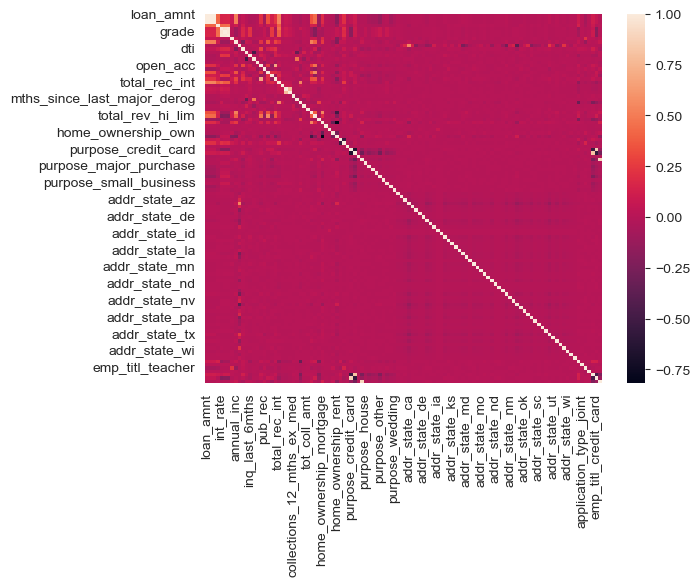

In [81]:
sns.heatmap(correlation)

#### These columns have low correlation, so we can remove that if we want, but since these seems important variables so will leave it till we get confirmation on the gravity of such variables


In [82]:
Default_ready.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,annual_inc,zip_code,...,addr_state_wi,addr_state_wv,addr_state_wy,initial_list_status_w,application_type_joint,emp_titl_teacher,emp_titl_manager,emp_titl_debt_cons,emp_titl_credit_card,emp_titl_home_imp
0,10000,10000,10000.0,36,13.11,1,8,6,30400.0,935,...,0,0,0,0,0,0,0,1,0,0
1,23400,23400,23400.0,60,22.99,5,25,10,65000.0,103,...,0,0,0,0,0,0,0,1,0,0
2,10000,10000,10000.0,36,9.99,1,7,9,45000.0,921,...,0,0,0,1,0,0,0,0,0,1
3,6500,6500,6425.0,36,15.61,3,15,10,65000.0,465,...,0,0,0,0,0,0,0,1,0,0
4,11000,11000,11000.0,36,12.69,2,11,10,42184.0,949,...,0,0,0,1,0,0,0,1,0,0


In [83]:
Default_filtered=Default_ready.iloc[:10000,:]
Default_filtered2=Default_ready.iloc[:1000,:]

In [84]:
for X in Default_filtered.columns:
    print("number and % of missing record for {} are {} and {}% respectively".format(X,Default_ready[X].isnull().sum(),(Default_ready[X].isnull().sum()/10000)*100 ))

number and % of missing record for loan_amnt are 0 and 0.0% respectively
number and % of missing record for funded_amnt are 0 and 0.0% respectively
number and % of missing record for funded_amnt_inv are 0 and 0.0% respectively
number and % of missing record for term are 0 and 0.0% respectively
number and % of missing record for int_rate are 0 and 0.0% respectively
number and % of missing record for grade are 0 and 0.0% respectively
number and % of missing record for sub_grade are 0 and 0.0% respectively
number and % of missing record for emp_length are 0 and 0.0% respectively
number and % of missing record for annual_inc are 0 and 0.0% respectively
number and % of missing record for zip_code are 0 and 0.0% respectively
number and % of missing record for dti are 0 and 0.0% respectively
number and % of missing record for delinq_2yrs are 0 and 0.0% respectively
number and % of missing record for inq_last_6mths are 0 and 0.0% respectively
number and % of missing record for mths_since_last_

In [ ]:
# we can check for pair plot | Not using the entire data due to resource constraint 
# Default_filtered_test=Default_ready.iloc[:1000,:]
# sns.pairplot(Default_filtered_test, diag_kind='kde',hue='loan_status')

#### italicized text Distribution of train attributes**

In [85]:
%%time 

#Distribution of train attributes-

def plot_train_attribute_distribution(t0,t1,label1,label2,train_attributes):
    i=0
    sns.set_style('darkgrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in train_attributes :
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(t0[attribute],hist=False,label=label1)
        sns.distplot(t1[attribute],hist=False,label=label2)
        plt.legend()
        plt.xlabel('Attribute',)
        sns.set_style("ticks",{"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

Wall time: 0 ns


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

<Figure size 640x480 with 0 Axes>

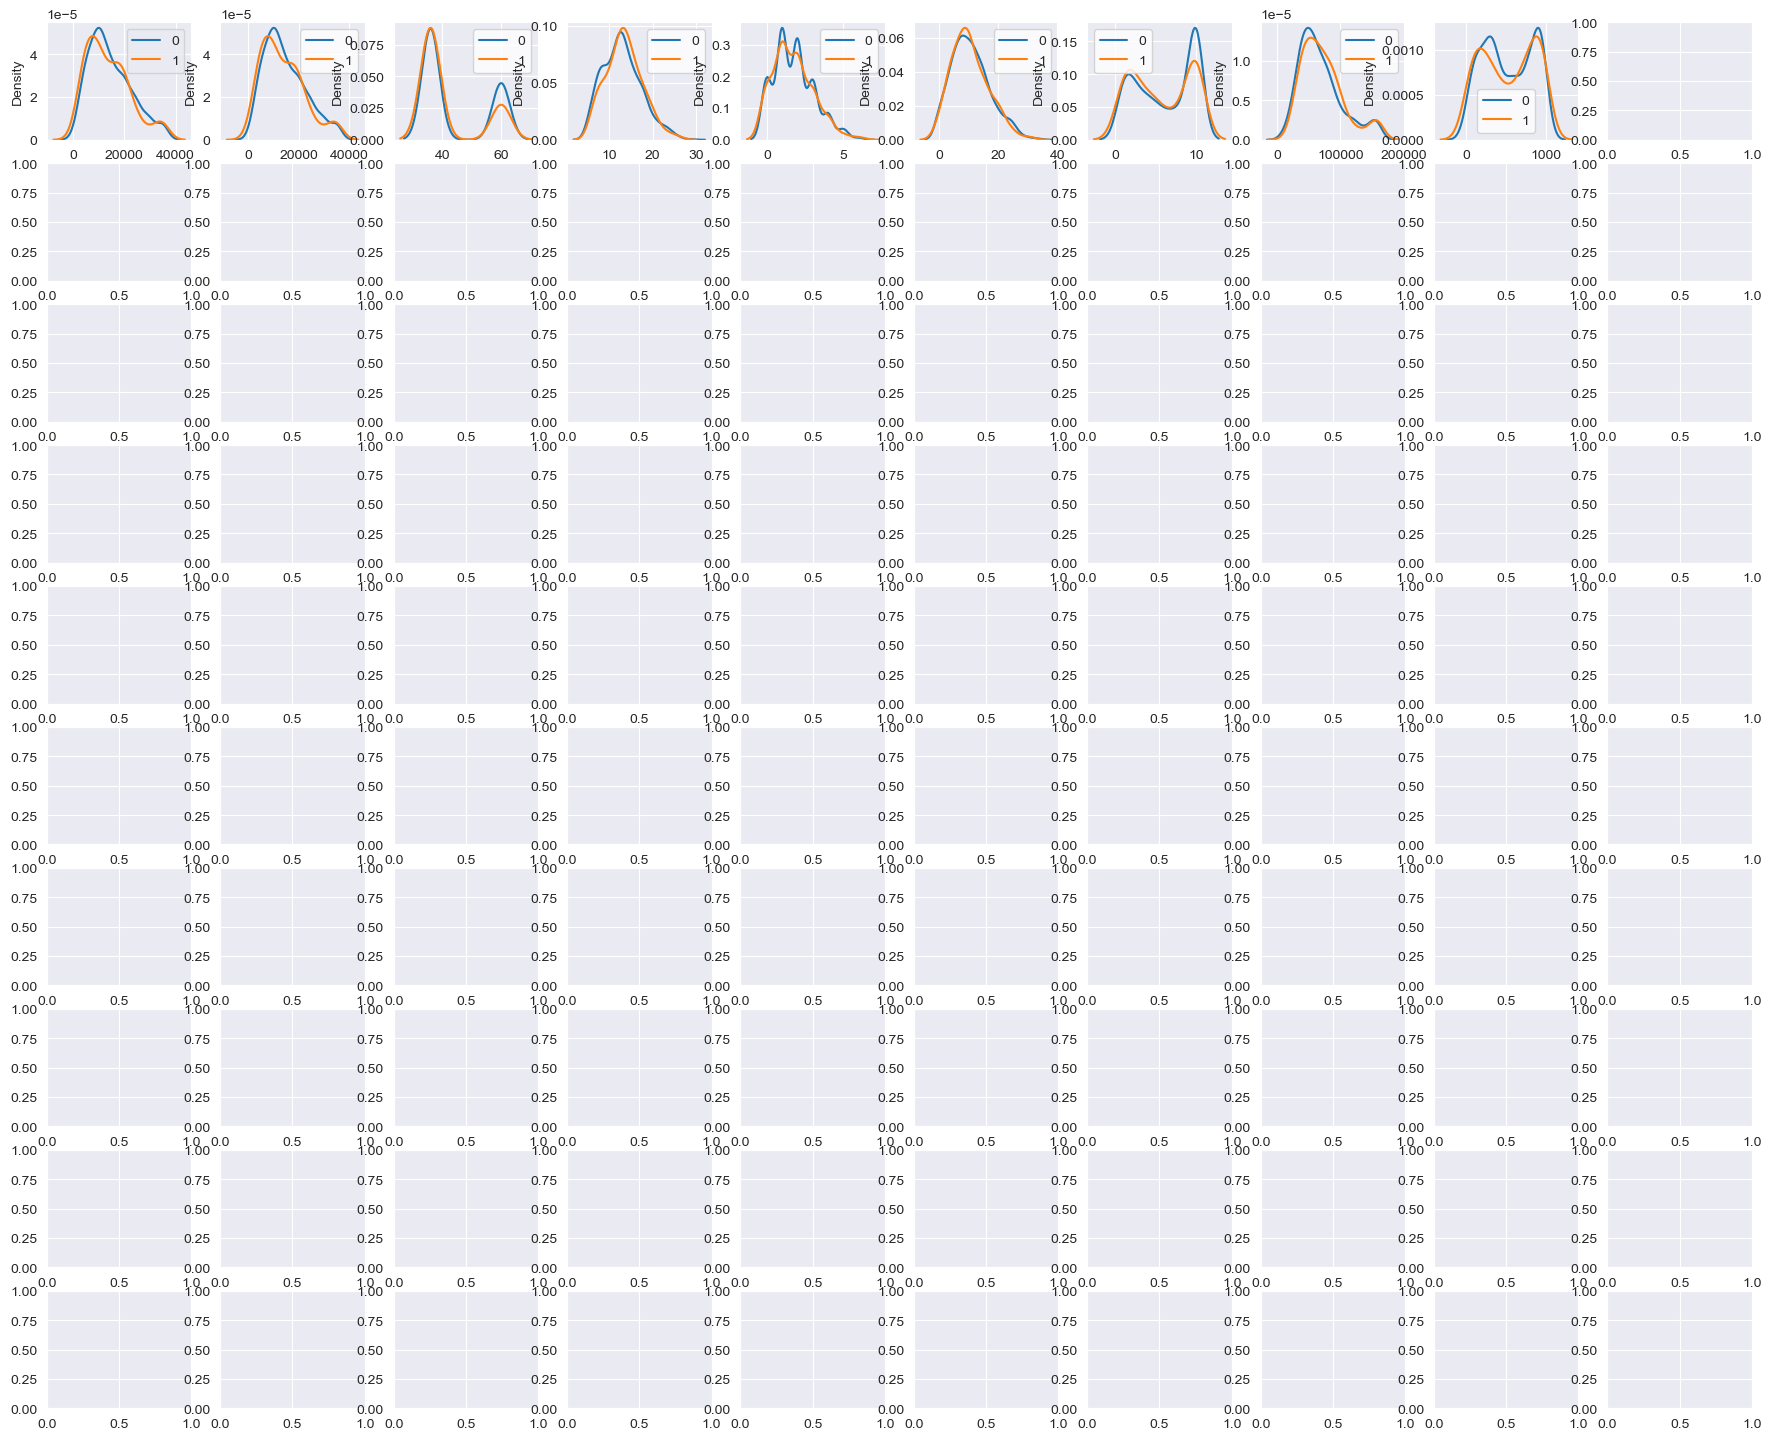

Wall time: 43.4 s


In [86]:
%%time
#Corresponding to negative class-
t0=Default_filtered2[Default_filtered2.loan_status.values==0]

#Corresponding to possitive class-a

t1=Default_filtered2[Default_filtered2.loan_status.values==1]

#train attributes 
train_attributes=Default_filtered2.columns.values[1:10]
# train_attributes=Default_ready.loc[:,Default_ready.columns!='loan_status']

#Plot distribution of train attributes-
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

In [87]:
# Let's check multicollinearity 
# to calculated VIF we can use the loop
Default_indep=Default_filtered.loc[:,Default_filtered.columns!='loan_status']

import statsmodels.api as sm
features=list(Default_indep.columns)
for i in range(1, len(Default_indep.columns)):
    x=Default_indep.loc[:,Default_indep.columns!=features[i]]
    y=Default_indep.loc[:,Default_indep.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("R-Sqr value of {} is {}".format(features[i],rsq))
    print ('VIF for {} is {}'.format(features[i],vif))

R-Sqr value of funded_amnt is 0.9990328893821082
VIF for funded_amnt is 1034.01
R-Sqr value of funded_amnt_inv is 0.9972712832257378
VIF for funded_amnt_inv is 366.47
R-Sqr value of term is 0.39311405289771073
VIF for term is 1.65
R-Sqr value of int_rate is 0.9709560977913855
VIF for int_rate is 34.43
R-Sqr value of grade is 0.9539843727225104
VIF for grade is 21.73
R-Sqr value of sub_grade is 0.9819275760457543
VIF for sub_grade is 55.33
R-Sqr value of emp_length is 0.13660048339130826
VIF for emp_length is 1.16
R-Sqr value of annual_inc is 0.5541682364177059
VIF for annual_inc is 2.24
R-Sqr value of zip_code is 0.9973991872145438
VIF for zip_code is 384.5
R-Sqr value of dti is 0.33180965137678753
VIF for dti is 1.5
R-Sqr value of delinq_2yrs is 0.2795539405946934
VIF for delinq_2yrs is 1.39
R-Sqr value of inq_last_6mths is 0.161652152595672
VIF for inq_last_6mths is 1.19
R-Sqr value of mths_since_last_delinq is 0.35590545431722154
VIF for mths_since_last_delinq is 1.55
R-Sqr value of

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


R-Sqr value of home_ownership_none is nan
VIF for home_ownership_none is nan
R-Sqr value of home_ownership_other is 0.48344362942172137
VIF for home_ownership_other is 1.94
R-Sqr value of home_ownership_own is 0.987908569608919
VIF for home_ownership_own is 82.7
R-Sqr value of home_ownership_rent is 0.9913226575076846
VIF for home_ownership_rent is 115.24
R-Sqr value of verification_status_source verified is 0.3481198593497411
VIF for verification_status_source verified is 1.53
R-Sqr value of verification_status_verified is 0.40710041425803656
VIF for verification_status_verified is 1.69
R-Sqr value of pymnt_plan_y is nan
VIF for pymnt_plan_y is nan
R-Sqr value of purpose_credit_card is 0.9520760946642716
VIF for purpose_credit_card is 20.87
R-Sqr value of purpose_debt_consolidation is 0.9603440794387093
VIF for purpose_debt_consolidation is 25.22
R-Sqr value of purpose_educational is 0.053290461715382875
VIF for purpose_educational is 1.06
R-Sqr value of purpose_home_improvement is 0.

#### Varibales ABC have high correlation, so either we can remove XYZ and re-run the VIF else use techniques like PCA to get rid of this


In [88]:
#We can reduce the multicollinearity with PCA 

from sklearn.decomposition import PCA
pca=PCA()

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler=StandardScaler()
scaler.fit(Default_indep)
scaled_df=scaler.transform(Default_indep)

In [91]:
# finding the PCA
PCA_result=pca.fit(scaled_df)
PCA_result.components_

array([[ 3.81302671e-01,  3.81332267e-01,  3.80920336e-01, ...,
         5.49667832e-02,  4.00479247e-03,  6.81770144e-03],
       [ 1.54087145e-02,  1.62584696e-02,  1.72903984e-02, ...,
        -1.34628593e-01,  2.26189382e-01,  5.07005114e-02],
       [ 3.46067064e-02,  3.41309844e-02,  3.26443909e-02, ...,
        -4.84935535e-01,  3.69323660e-01,  1.06044694e-01],
       ...,
       [ 0.00000000e+00,  1.09404989e-18,  3.74280731e-19, ...,
         4.58332159e-17,  4.98772012e-17,  5.29238619e-17],
       [ 0.00000000e+00,  4.22976745e-17, -1.31959164e-17, ...,
        -3.85524092e-18, -2.54640959e-17, -3.06850485e-18],
       [-0.00000000e+00,  6.87233432e-19,  1.20785048e-18, ...,
         4.09833473e-17,  4.69987882e-17,  3.34625428e-17]])

In [92]:
PCA_result.explained_variance_

array([5.33093711e+00, 4.09913573e+00, 2.86779371e+00, 2.50586162e+00,
       2.11229788e+00, 1.94592502e+00, 1.92223528e+00, 1.87045373e+00,
       1.75840776e+00, 1.68240281e+00, 1.51319555e+00, 1.37435270e+00,
       1.33258589e+00, 1.29971098e+00, 1.22491847e+00, 1.15569138e+00,
       1.13828717e+00, 1.11631775e+00, 1.11089897e+00, 1.10415800e+00,
       1.09889178e+00, 1.09225317e+00, 1.07878399e+00, 1.07677584e+00,
       1.06873914e+00, 1.06819632e+00, 1.06300647e+00, 1.06036401e+00,
       1.05094272e+00, 1.04896153e+00, 1.04375930e+00, 1.03784365e+00,
       1.03496299e+00, 1.03312795e+00, 1.02976211e+00, 1.02716925e+00,
       1.02646387e+00, 1.02413721e+00, 1.01931395e+00, 1.01880465e+00,
       1.01816212e+00, 1.01740392e+00, 1.01590055e+00, 1.01525549e+00,
       1.01392410e+00, 1.01376317e+00, 1.01216187e+00, 1.01203402e+00,
       1.00939974e+00, 1.00891902e+00, 1.00838227e+00, 1.00714286e+00,
       1.00529737e+00, 1.00469181e+00, 1.00322175e+00, 1.00156265e+00,
      

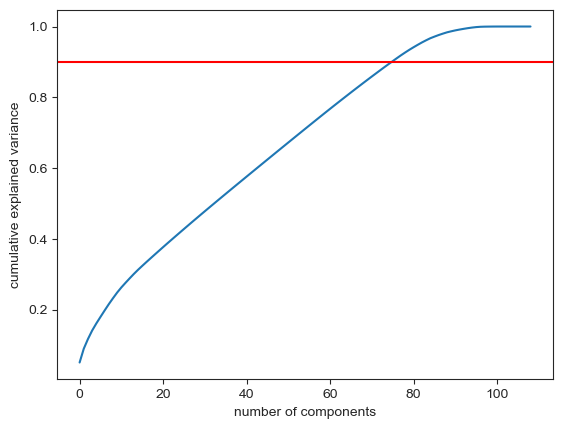

In [93]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=.9,color='r')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

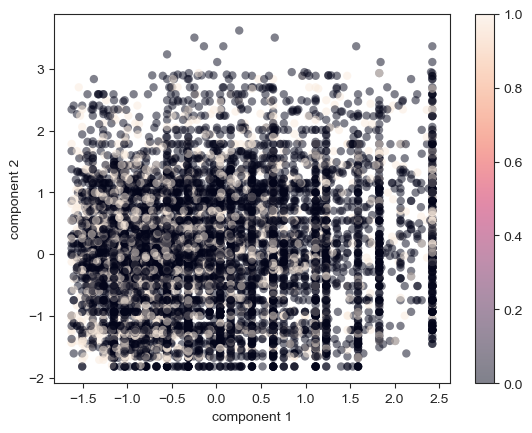

In [94]:
plt.scatter(scaled_df[:, 0],scaled_df[:, 4],
            c=Default_filtered.loan_status, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [95]:
pca=PCA(n_components=90)
x_pca=pca.fit_transform(scaled_df)
final_train_X=pd.DataFrame(x_pca) 
X=final_train_X

In [96]:
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.ensemble import RandomForestClassifier
# from pdpbox import pdp, get_dataset, info_plots
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc


random_state=42
np.random.seed(random_state)
import warnings
warnings.filterwarnings('ignore')

### Spliting the data via Sratified KFold Cross Validator:-


In [97]:
#Spliting the data via Sratified KFold Cross Validator:-

#Training Data:
# X=final_train.drop(['loan_status'],axis=1)
Y=Default_filtered['loan_status']

#Stratified KFold Cross Validator:-
#Same proportion of different class are present in train and test:StratifiedKFold
skf=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, valid_index in skf.split(X,Y): 
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index] 
    y_train, y_valid = Y.iloc[train_index], Y.iloc[valid_index]
    
print('Shape of X_train :',X_train.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of X_train : (8000, 90)
Shape of X_valid : (2000, 90)
Shape of y_train : (8000,)
Shape of y_valid : (2000,)


In [98]:
%%time
lr_model=LogisticRegression(random_state=42)
#fitting the model-
lr_model.fit(X_train,y_train)

Wall time: 839 ms


LogisticRegression(random_state=42)

In [99]:
#Accuracy of model-
lr_score=lr_model.score(X_train,y_train)
print('Accuracy of lr_model :',lr_score)

Accuracy of lr_model : 0.796125


In [100]:
%%time
#Cross validation prediction of lr_model-
cv_predict=cross_val_predict(lr_model,X_valid,y_valid,cv=5)
#Cross validation score-
cv_score=cross_val_score(lr_model,X_valid,y_valid,cv=5)
print('cross val score :',np.average(cv_score))

cross val score : 0.7835
Wall time: 3.09 s


In [ ]:
Accuracy of the model is not th best metric to use while evaluating the imbalanced datasets as it may be misleading.
  We are going to change the performance metric.

## confusion matrix

In [101]:
#Confusion matrix:-
cm=confusion_matrix(y_valid,cv_predict)
cm=pd.crosstab(y_valid,cv_predict)
cm

col_0,0,1
loan_status,,
0,1434,106
1,327,133


In [102]:
Accuracy of the model is not th best metric to use while evaluating the imbalanced datasets as it may be misleading. We are going to change the performance metric.

Confusion Matrix:-

SyntaxError: invalid syntax (2125370419.py, line 1)

In [110]:
#Confusion matrix:-
cm=confusion_matrix(y_valid,cv_predict)
cm=pd.crosstab(y_valid,cv_predict)
cm

col_0,0,1
loan_status,,
0,1434,106
1,327,133


In [111]:
#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_valid,cv_predict)
print('ROC Score:',roc_score)

ROC Score: 0.6101496329757199


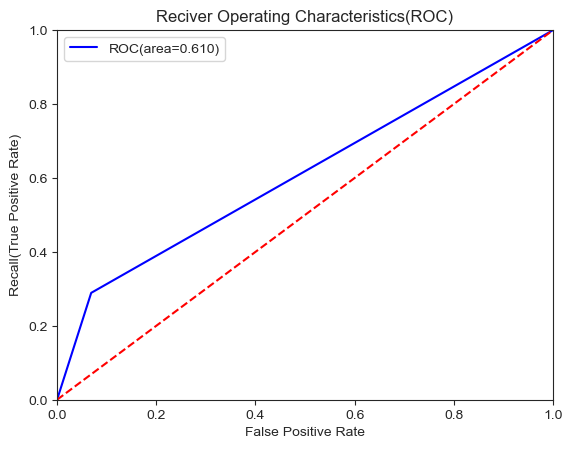

AUC: 0.6101496329757199


In [112]:
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_valid,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [ ]:
Observation:- On comparing roc_auc_score and model accuracy, model is not 

1.   List item
2.   List item

performing well on imbalanced data.

In [113]:
#Classification report:-
classification_scores=classification_report(y_valid,cv_predict)
print(classification_scores)

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1540
           1       0.56      0.29      0.38       460

    accuracy                           0.78      2000
   macro avg       0.69      0.61      0.62      2000
weighted avg       0.76      0.78      0.76      2000



In [ ]:
**Observation:-** As we see that f1 score is high for the customers who will not make a transaction, compare to those who will make a transaction.
    So, we are going to change the algorithm.

In [114]:
Default_filtered_test=Default_ready.iloc[10000:15000,:]

In [115]:
%%time
#Model performance on test data:-
X_test=Default_filtered_test.drop(['loan_status'],axis=1)

x_pca_test=pca.fit_transform(X_test)
final_test_X=pd.DataFrame(x_pca_test) 
X_test_fin=final_test_X

lr_pred=lr_model.predict(X_test_fin)
print(lr_pred)

[0 1 1 ... 0 0 0]
Wall time: 253 ms
